In [1]:
import matplotlib.pyplot as plt
import numpy as np
from constants import CACHE_PATH, MASS_BINS

In [37]:
slices = np.array([0, 200, 400, 600, 800, 1000, 1200, 1400, 1497, 1545, 1568])

((11,), (11,))

In [90]:
total = np.loadtxt('eps_all_test.out')
total2 = np.loadtxt('eps_all_test_lorentz.out')
total3 = np.loadtxt('eps_all_test_abs.out')

In [95]:
x = np.array([])
y = np.array([])
y2 = np.array([])
y3 = np.array([])
y4 = np.array([])
y5 = np.array([])
y6 = np.array([])
for i in range(slices.size - 1):
    x = np.append(x, np.mean([MASS_BINS[i], MASS_BINS[i + 1]]))
    y = np.append(y, np.mean(total[slices[i]: slices[i + 1] + 1, -1][~np.isnan(total[slices[i]: slices[i + 1] + 1, -1])]))
    y2 = np.append(y2, np.std(total[slices[i]: slices[i + 1] + 1, 0]))
    y3 = np.append(y3, np.mean(total2[slices[i]: slices[i + 1] + 1, -1][~np.isnan(total2[slices[i]: slices[i + 1] + 1, -1])]))
    y4 = np.append(y4, np.std(total2[slices[i]: slices[i + 1] + 1, 0]))
    y5 = np.append(y5, np.mean(total3[slices[i]: slices[i + 1] + 1, -1][~np.isnan(total3[slices[i]: slices[i + 1] + 1, -1])]))
    y6 = np.append(y6, np.std(total3[slices[i]: slices[i + 1] + 1, 0]))

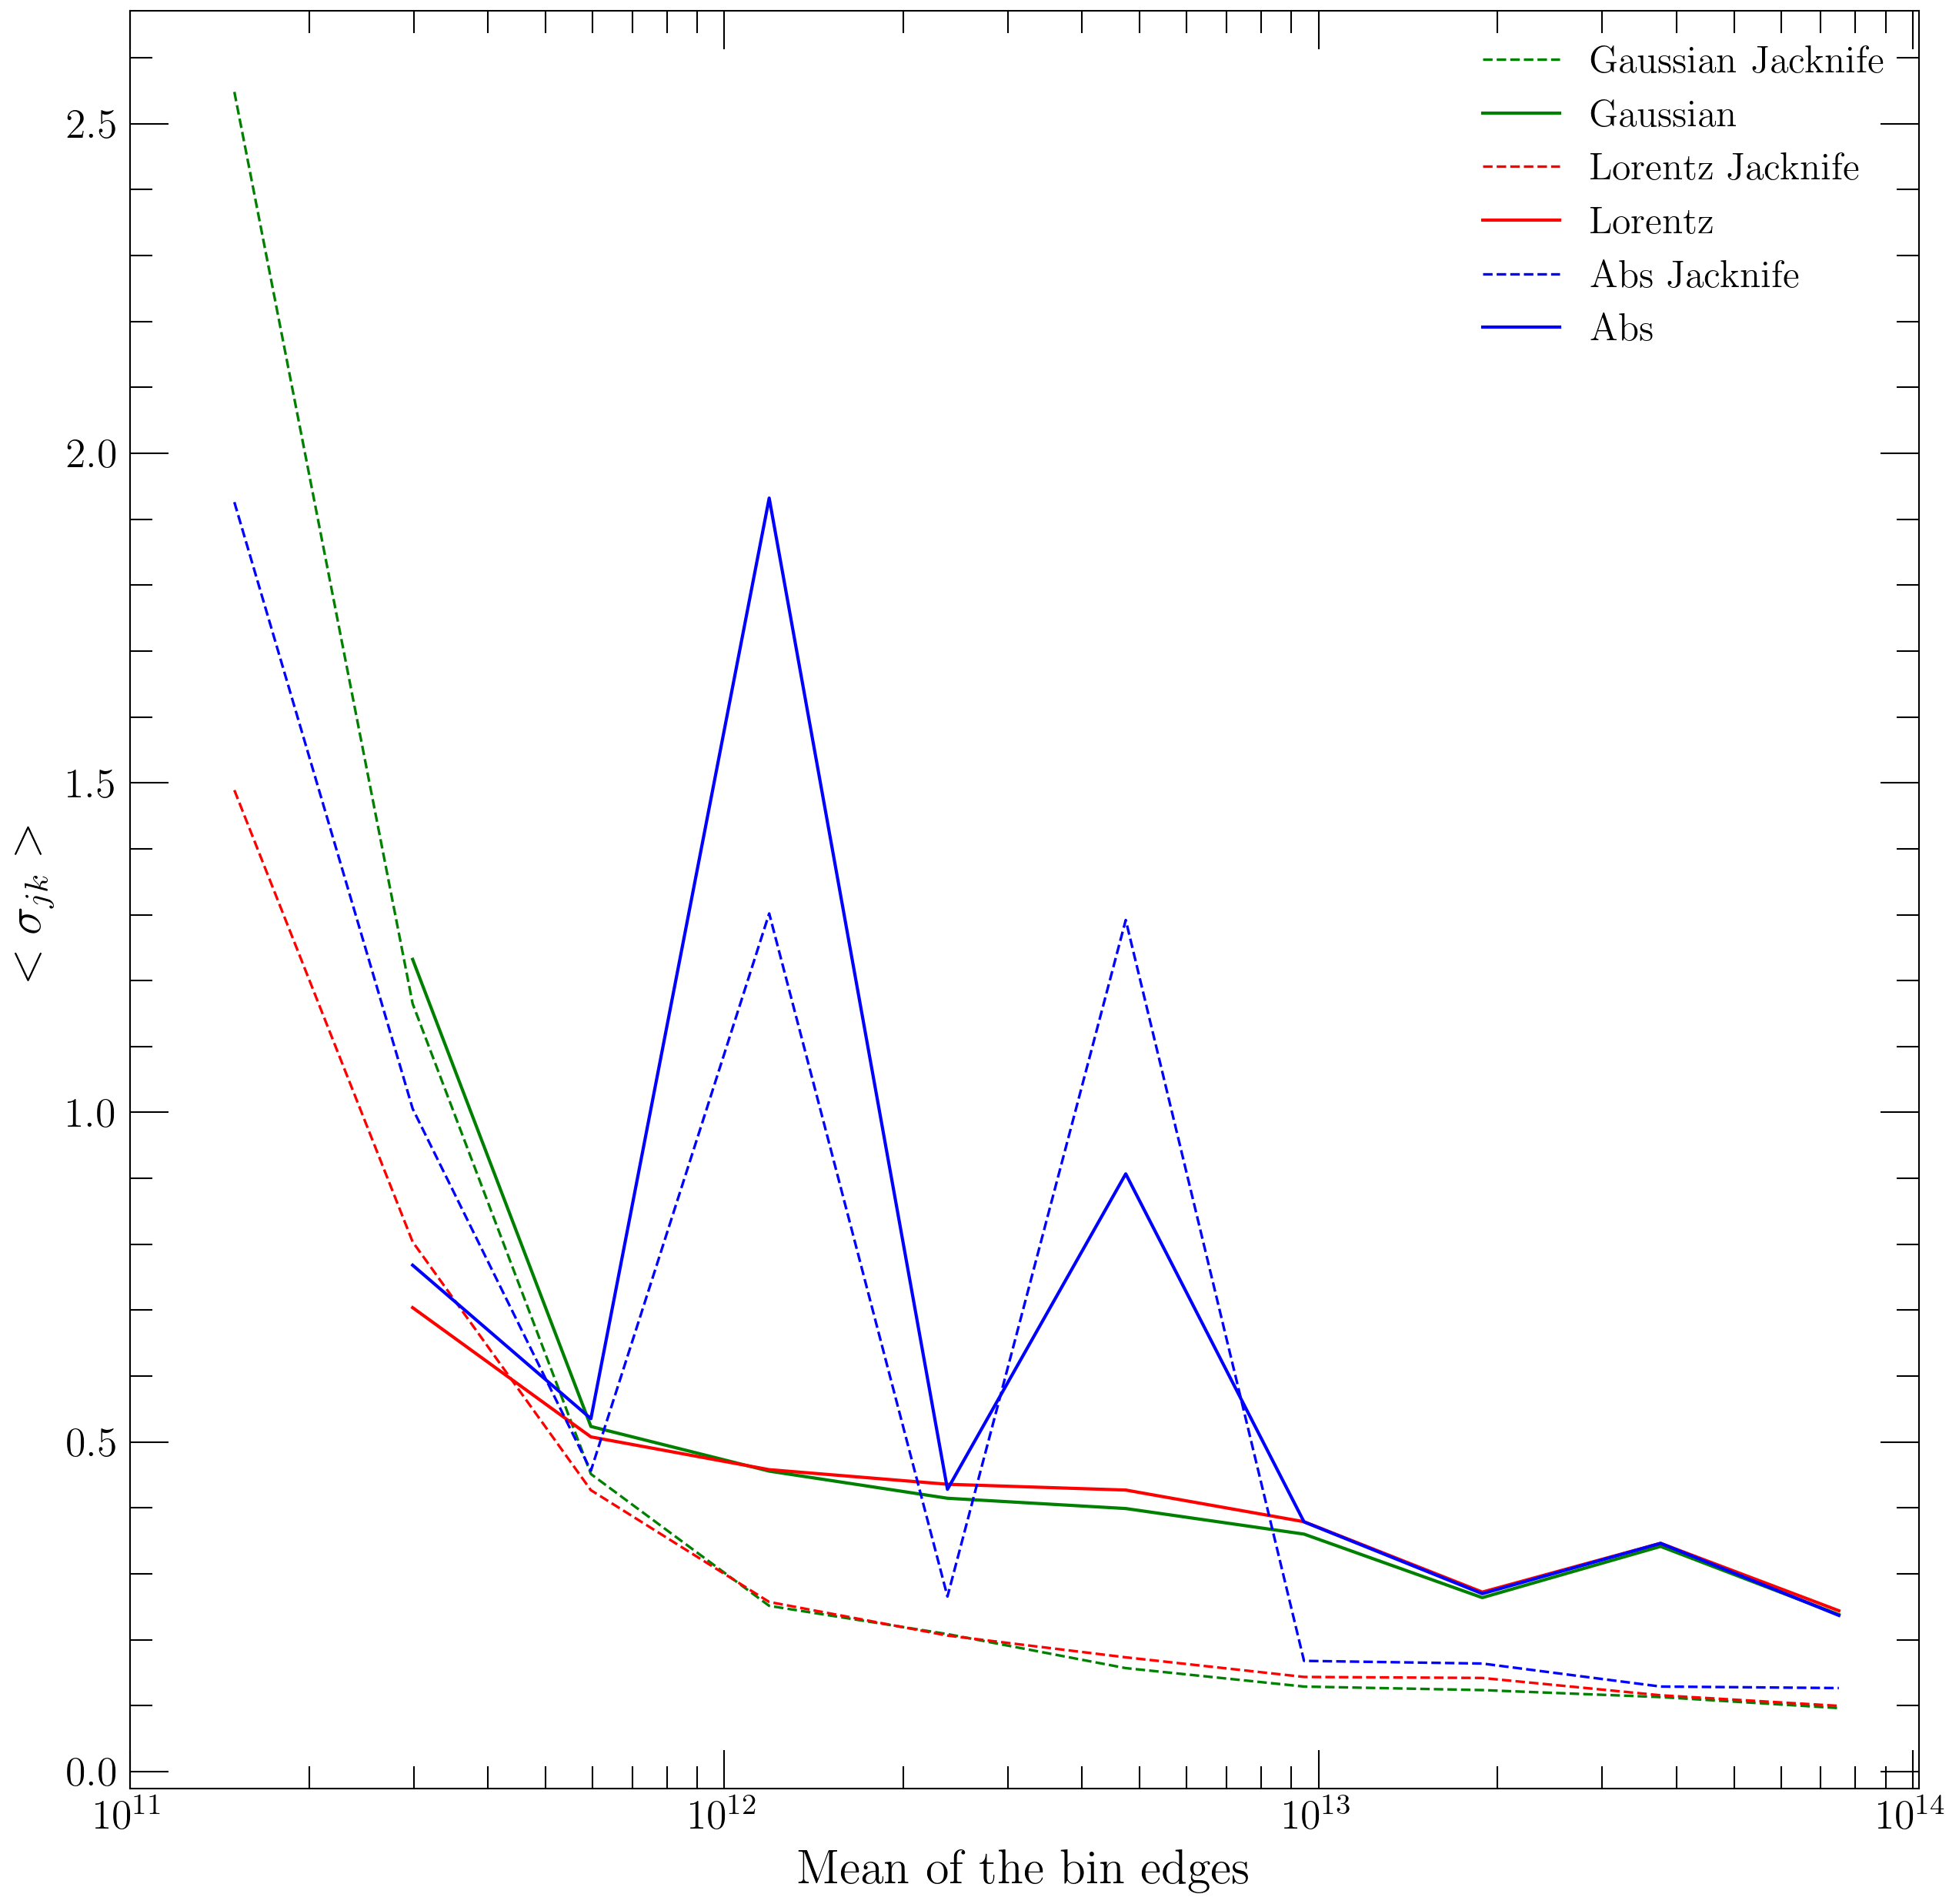

In [96]:
fig = plt.figure(figsize=(10, 10))
plt.plot(x, y, 'g--', linewidth=0.8, label='Gaussian Jacknife')
plt.plot(x, y2, 'g', label='Gaussian')
plt.plot(x, y3, 'r--', linewidth=0.8, label='Lorentz Jacknife')
plt.plot(x, y4, 'r', label='Lorentz')
plt.plot(x, y5, 'b--', linewidth=0.8, label='Abs Jacknife')
plt.plot(x, y6, 'b', label='Abs')
plt.ylabel(r'$<\sigma_{jk}>$')
plt.xlabel('Mean of the bin edges')
plt.xscale('log')
plt.xticks([1e11, 1e12, 1e13, 1e14])
plt.legend()

In [37]:
x = np.array([])
y = np.array([])
y2 = np.array([])
for i in range(8):
    y = np.append(y, np.std(se_jk[slices[i]: slices[i + 1] + 1]))
    y2 = np.append(y2, np.std(se_jk_2[slices[i]: slices[i + 1] + 1]))
    x = np.append(x, np.mean([MASS_BINS[i], MASS_BINS[i + 1]]))

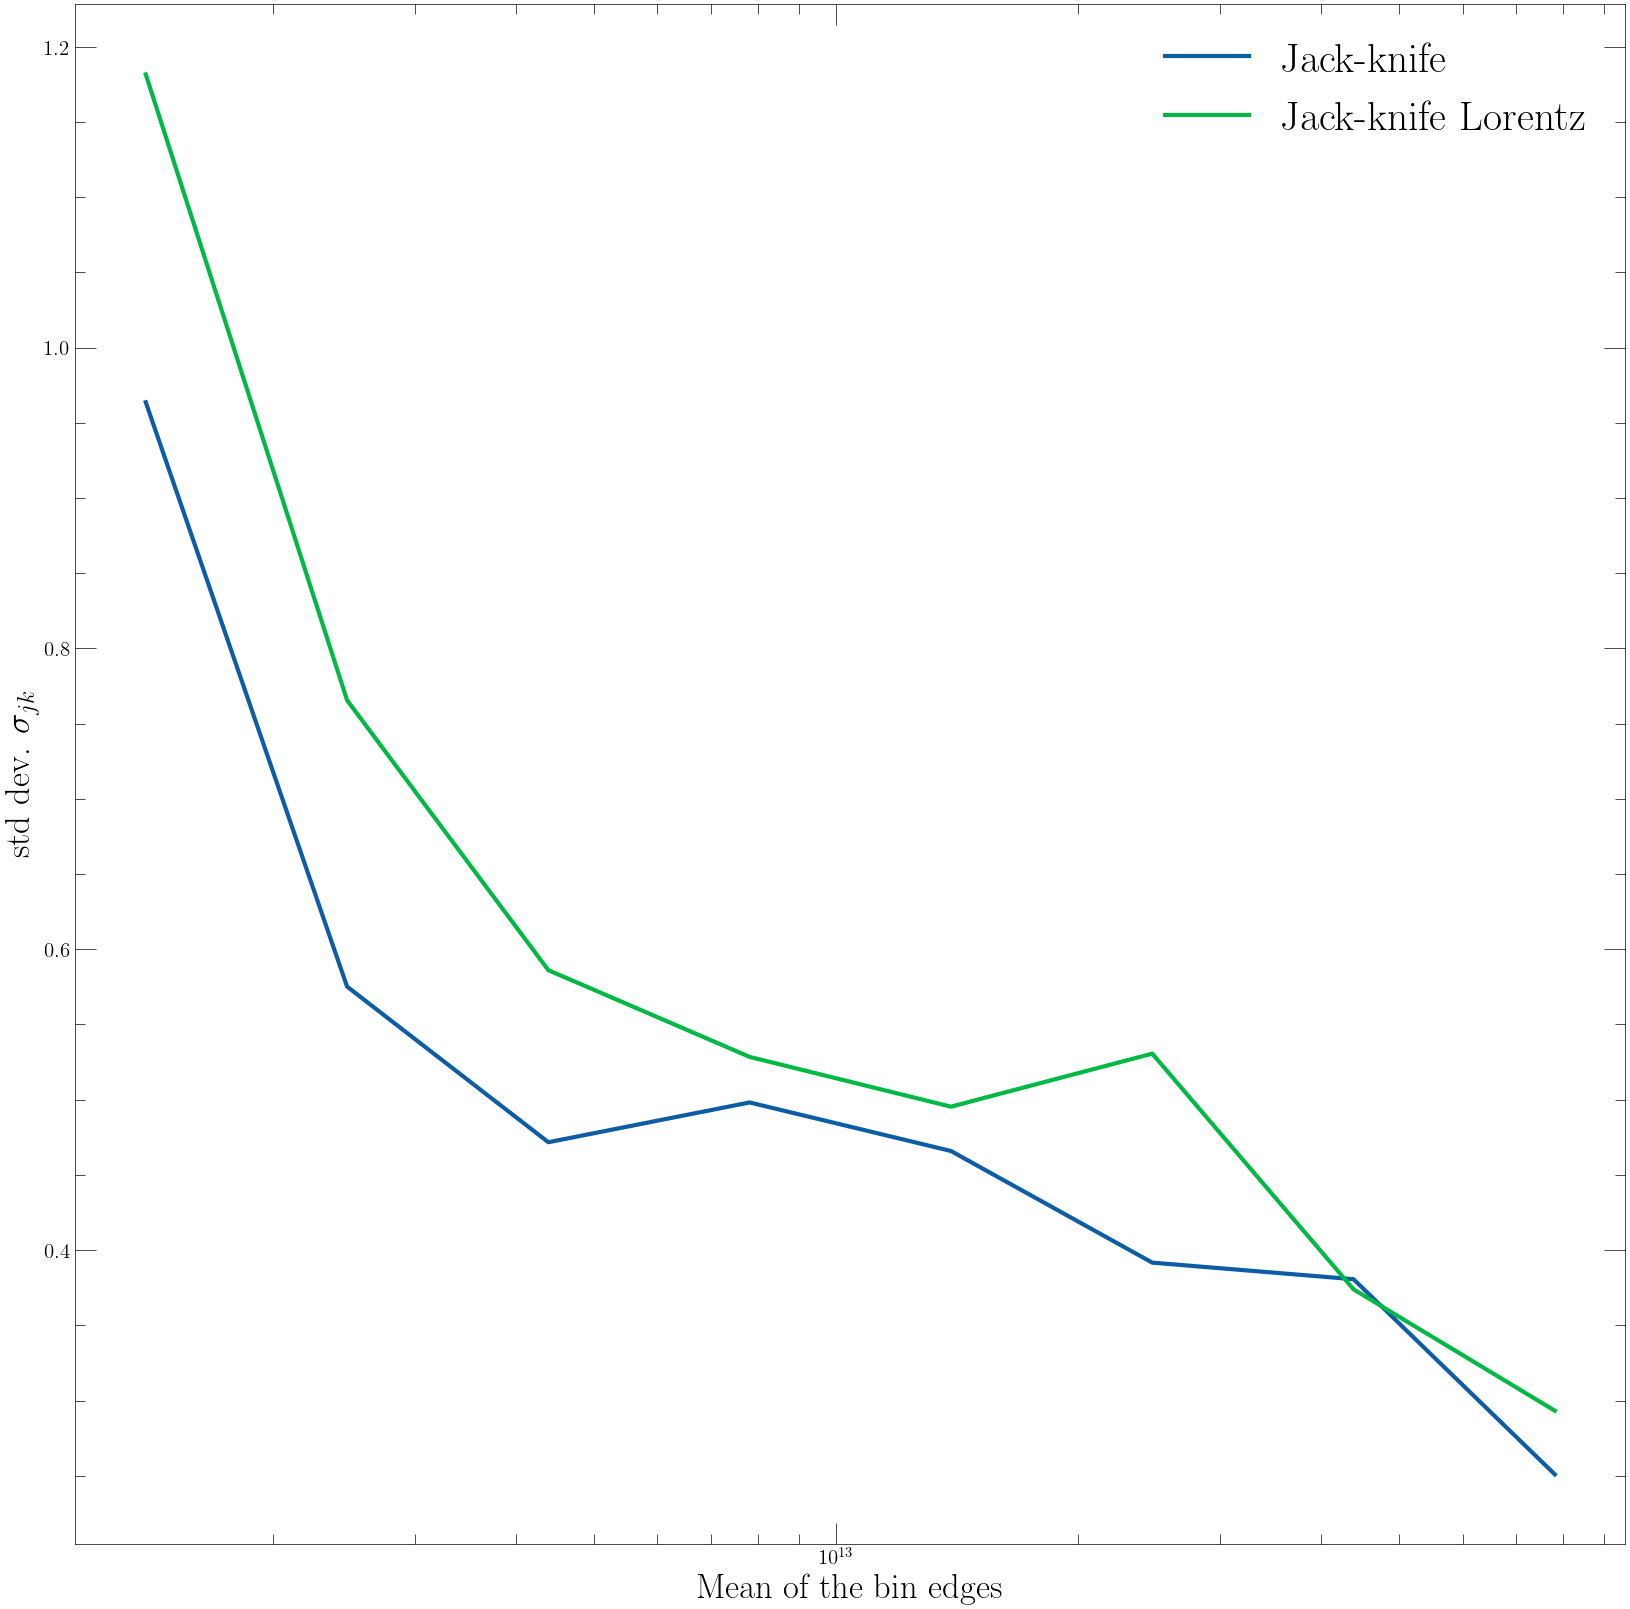

In [38]:
# make sure to change y to have std instead of mean
plt.plot(x, y, linewidth=3, label='Jack-knife')
plt.plot(x, y2, linewidth=3, label='Jack-knife Lorentz')
plt.ylabel(r'std dev. $\sigma_{jk}$')
plt.xlabel('Mean of the bin edges')
plt.xscale('log')
plt.legend()

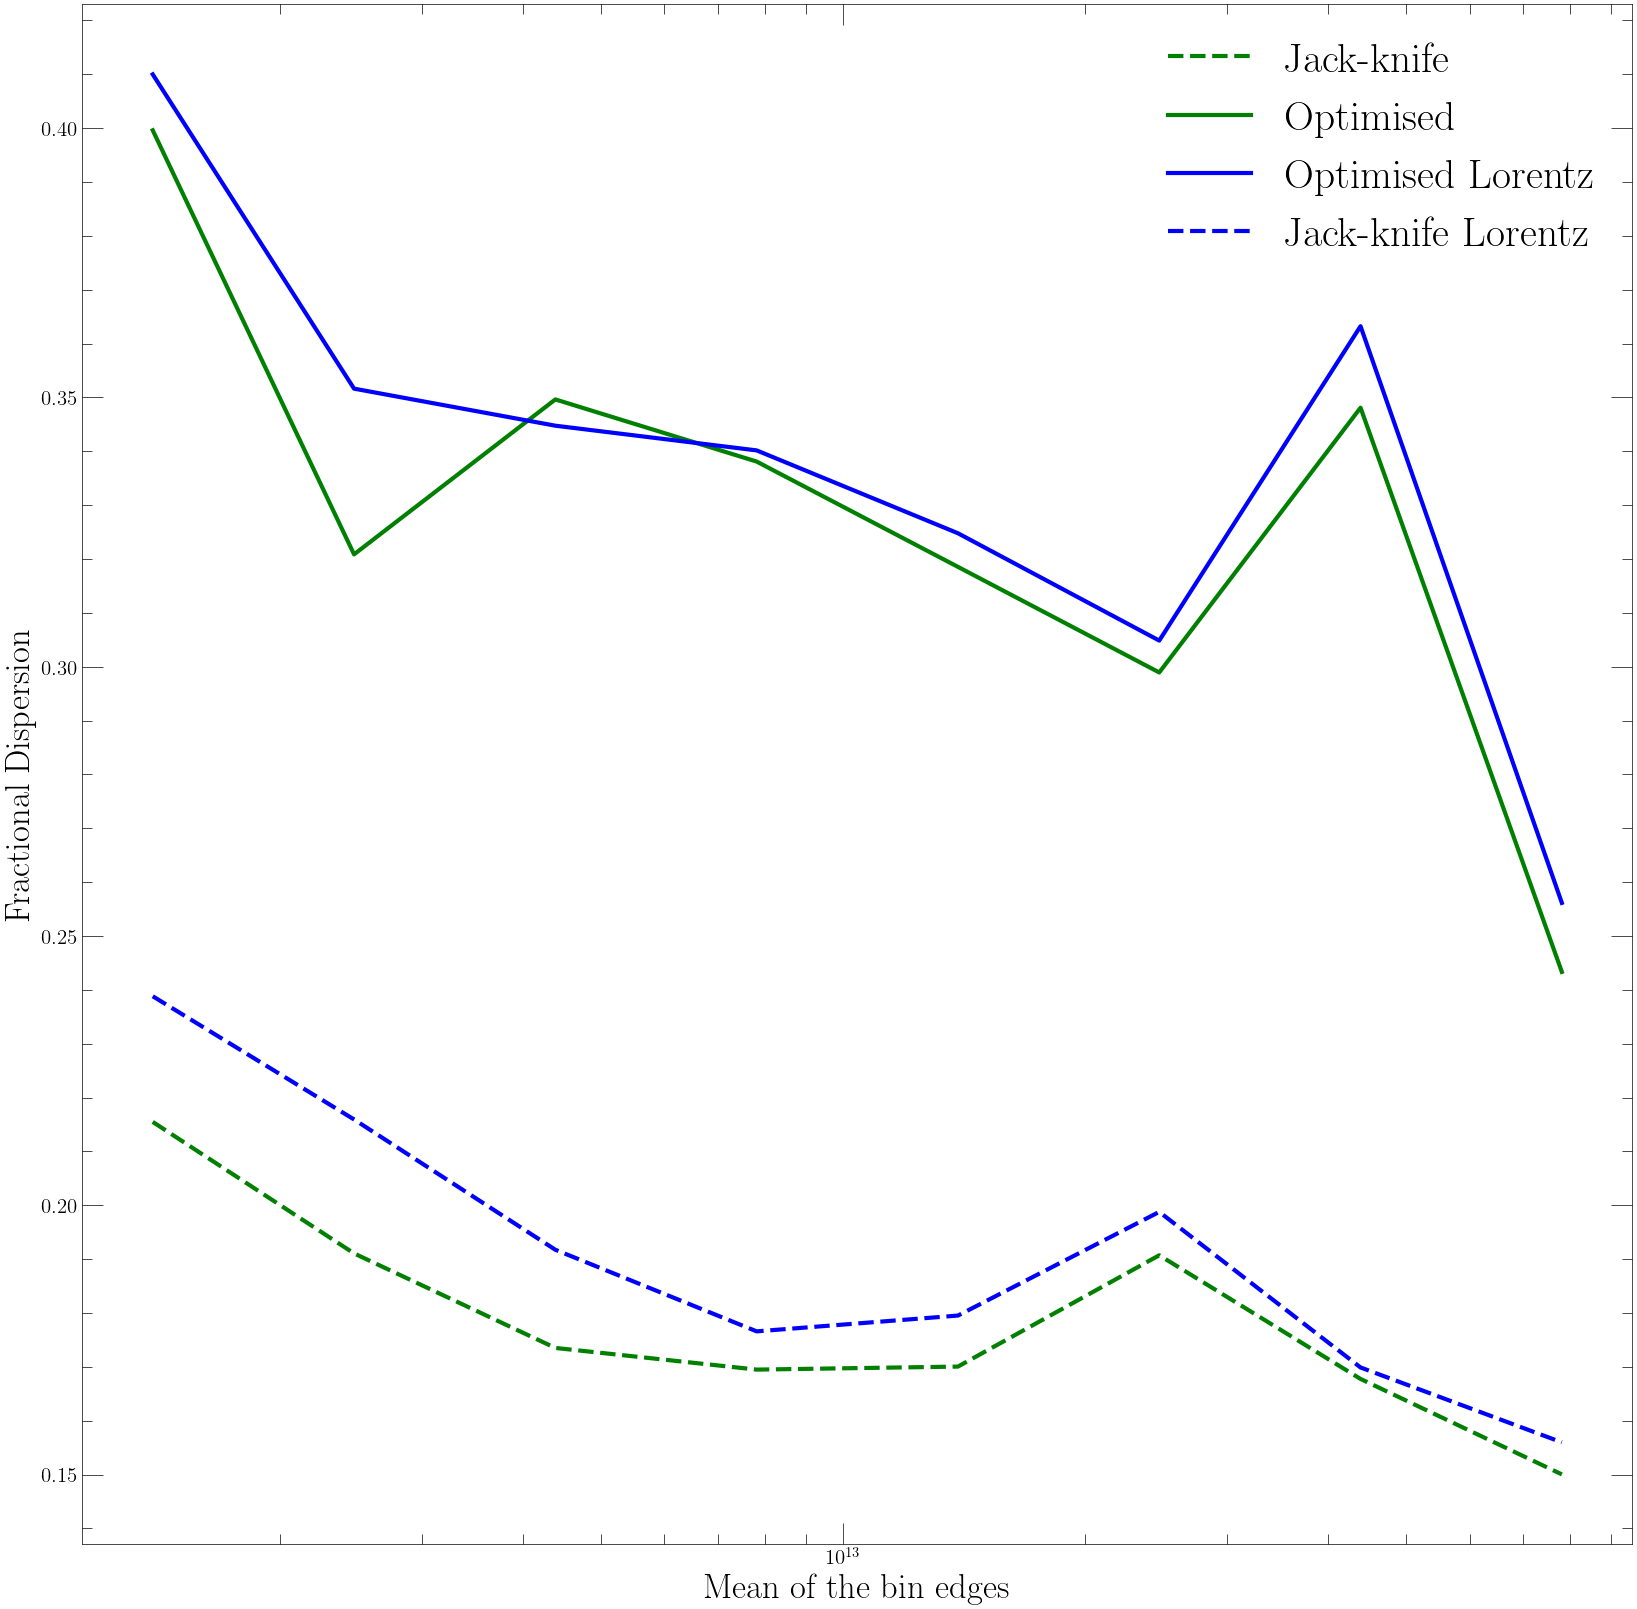

In [46]:
plt.plot(x, y/z, 'g--', linewidth=3, label='Jack-knife')
# plt.plot(x, y2/z, label='Intrinsic')
plt.plot(x, y3/z, 'g', linewidth=3, label='Optimised')
plt.plot(x, y4/z, 'b', linewidth=3, label='Optimised Lorentz')
plt.plot(x, y5/z, 'b--', linewidth=3, label='Jack-knife Lorentz')
plt.ylabel(r'Fractional Dispersion')
plt.xlabel('Mean of the bin edges')
plt.xscale('log')
plt.legend()